In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/Users/houhiroshisakai/Desktop/Schulich/MMAI 5000 N - Artificial Intelligent Fundamentals/Group Project Data-SFD Data-Toronto Police.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

In [4]:
#Replace 'NSA' to NULL
df = df.replace(to_replace = 'NSA', value = np.nan)


In [5]:
df.dropna(inplace=True)

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5641 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5641 non-null   float64
 1   Y                  5641 non-null   float64
 2   OBJECTID           5641 non-null   int64  
 3   EVENT_UNIQUE_ID    5641 non-null   object 
 4   OCC_DATE           5641 non-null   object 
 5   OCC_YEAR           5641 non-null   int64  
 6   OCC_MONTH          5641 non-null   object 
 7   OCC_DOW            5641 non-null   object 
 8   OCC_DOY            5641 non-null   int64  
 9   OCC_DAY            5641 non-null   int64  
 10  OCC_HOUR           5641 non-null   int64  
 11  OCC_TIME_RANGE     5641 non-null   object 
 12  DIVISION           5641 non-null   object 
 13  DEATH              5641 non-null   int64  
 14  INJURIES           5641 non-null   int64  
 15  HOOD_158           5641 non-null   float64
 16  NEIGHBOURHOOD_158  5641 non-n

<Axes: xlabel='DIVISION', ylabel='Count'>

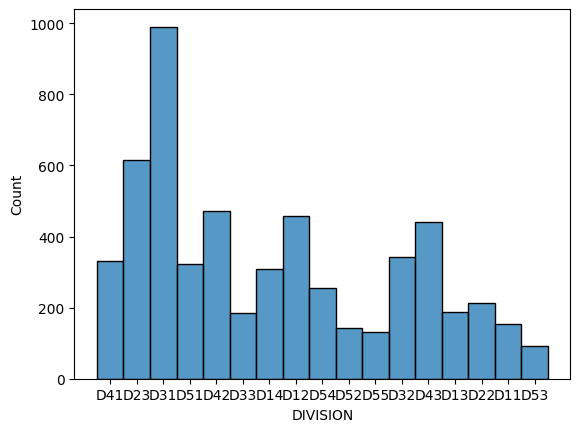

In [8]:
sns.histplot(df['DIVISION'])

<Axes: xlabel='OCC_TIME_RANGE', ylabel='Count'>

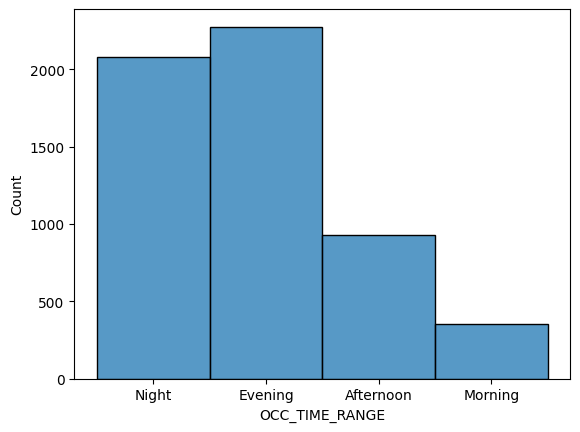

In [9]:
sns.histplot(df['OCC_TIME_RANGE'])

In [10]:
#Convert "Year" column to datetime
year_count = df.groupby('OCC_YEAR').size()

In [11]:
print(year_count)

OCC_YEAR
2004    183
2005    251
2006    208
2007    202
2008    235
2009    247
2010    251
2011    223
2012    215
2013    195
2014    177
2015    288
2016    407
2017    392
2018    427
2019    492
2020    461
2021    408
2022    379
dtype: int64


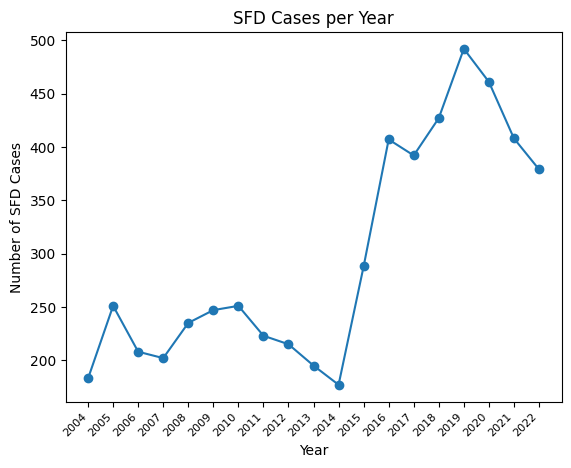

In [12]:
plt.plot(year_count.index, year_count.values,marker = 'o')
plt.xticks(year_count.index)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xlabel ('Year')
plt.ylabel('Number of SFD Cases')
plt.title('SFD Cases per Year')
plt.show()

In [13]:
season_period = {
    'January' : 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Autumn',
    'October': 'Autumn',
    'November': 'Autumn',
    'December': 'Winter'
}

In [14]:
df['Season'] = df['OCC_MONTH'].map(season_period)

<Axes: xlabel='Season', ylabel='Count'>

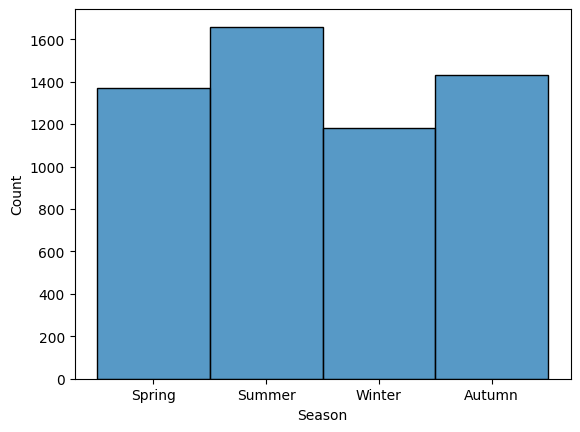

In [15]:
sns.histplot(data = df['Season'],bins = ['Spring','Summer','Autumn','Winter'])

In [19]:
season_count = df['Season'].value_counts()

Text(0.5, 1.0, 'Seasons Period Distribution')

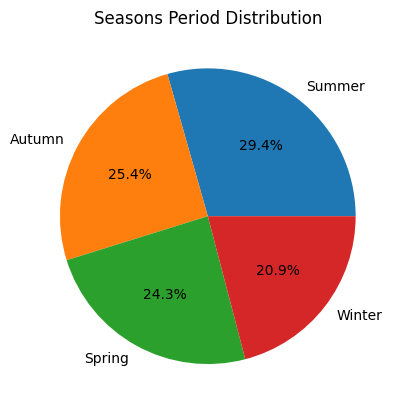

In [23]:
plt.pie(season_count.values, labels = season_count.index, autopct='%1.1f%%')
plt.title('Seasons Period Distribution')